## Finding the Wine Quality using Support Vector Machine Algorithm 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading the data
df=pd.read_csv("https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv")

In [3]:
# Top 5 records
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
# bottom 5 records
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [5]:
# Summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
# Checking null/missing values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
# Statistical analysis of dataset
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [8]:
# Columns of dataset
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [9]:
# Target column data
df.quality

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [10]:
# Unique values of target column
df.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [11]:
# Checking the distribution of quality column
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [12]:
# Correlation
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


<AxesSubplot: >

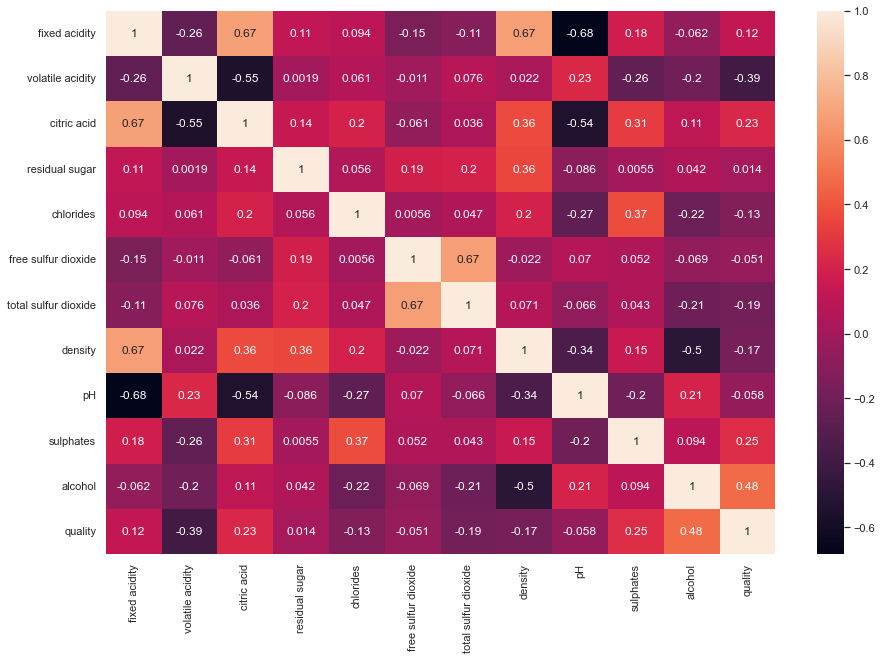

In [15]:
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(df.corr(),annot=True)

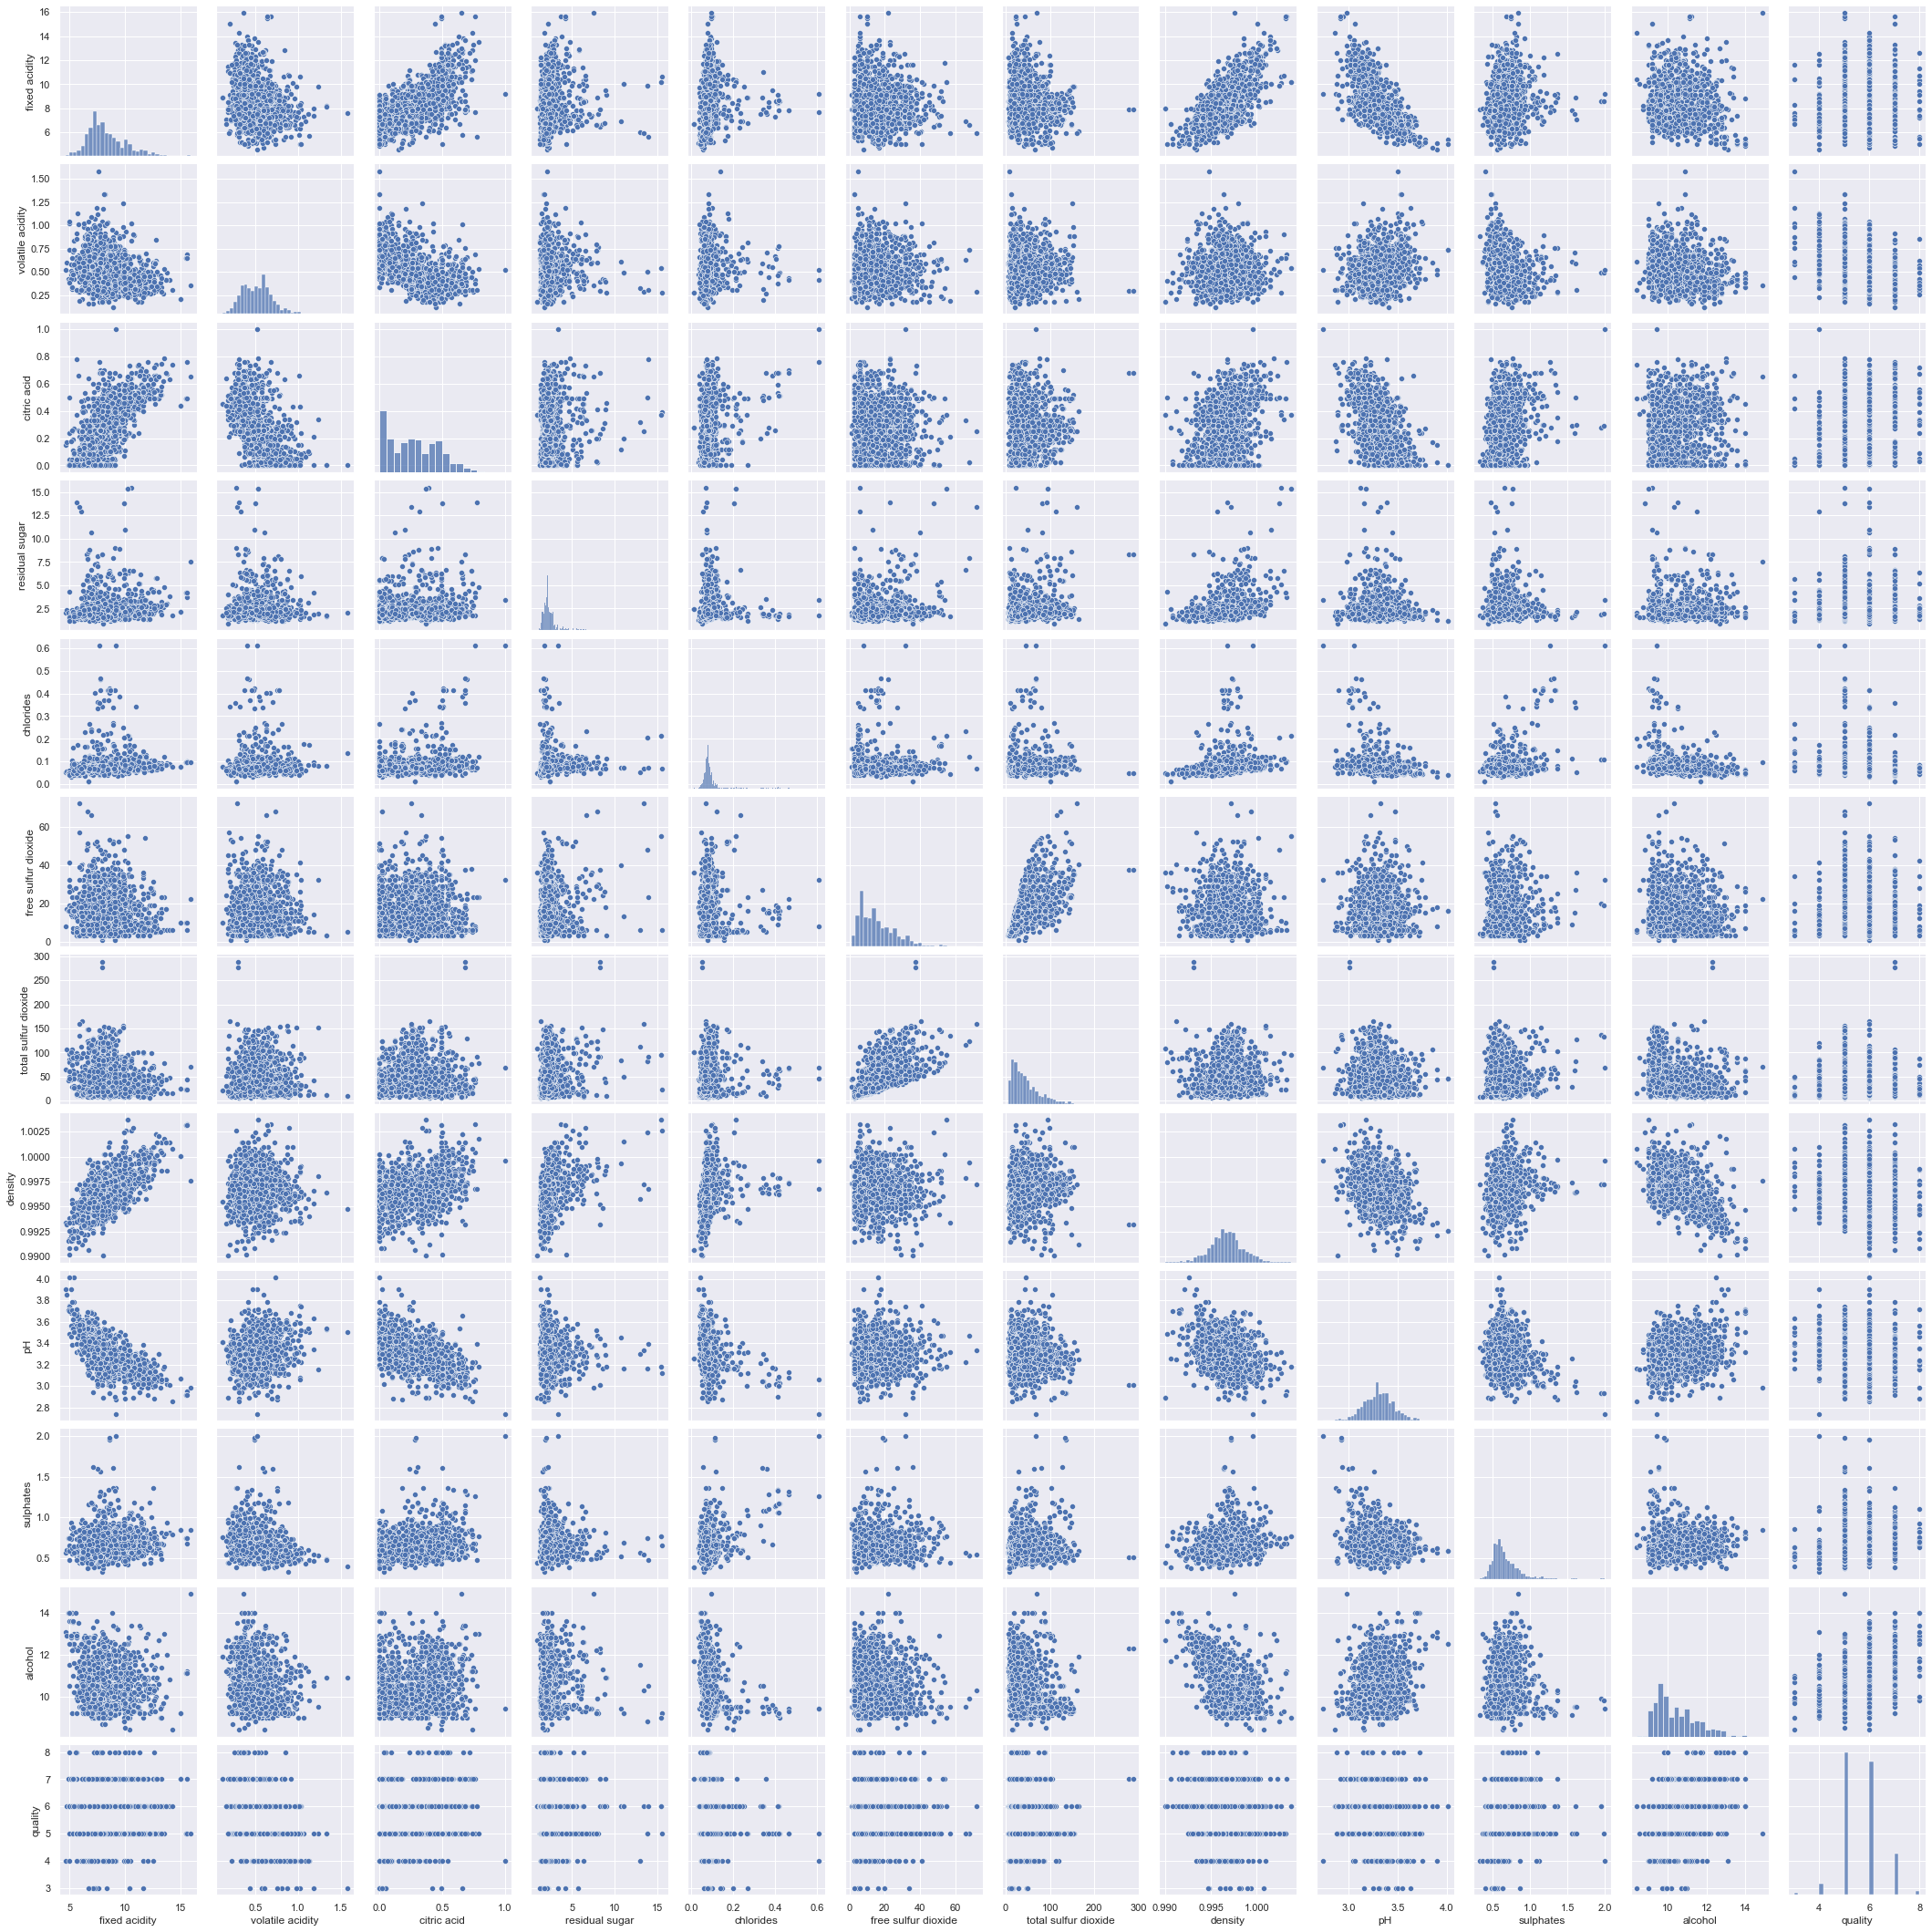

In [19]:
sns.pairplot(data=df)

<AxesSubplot: xlabel='quality', ylabel='count'>

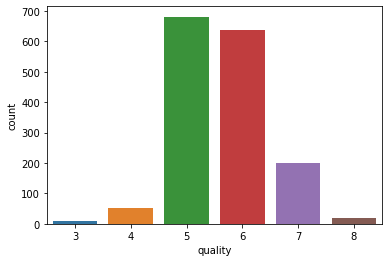

In [16]:
sns.countplot(df.quality)

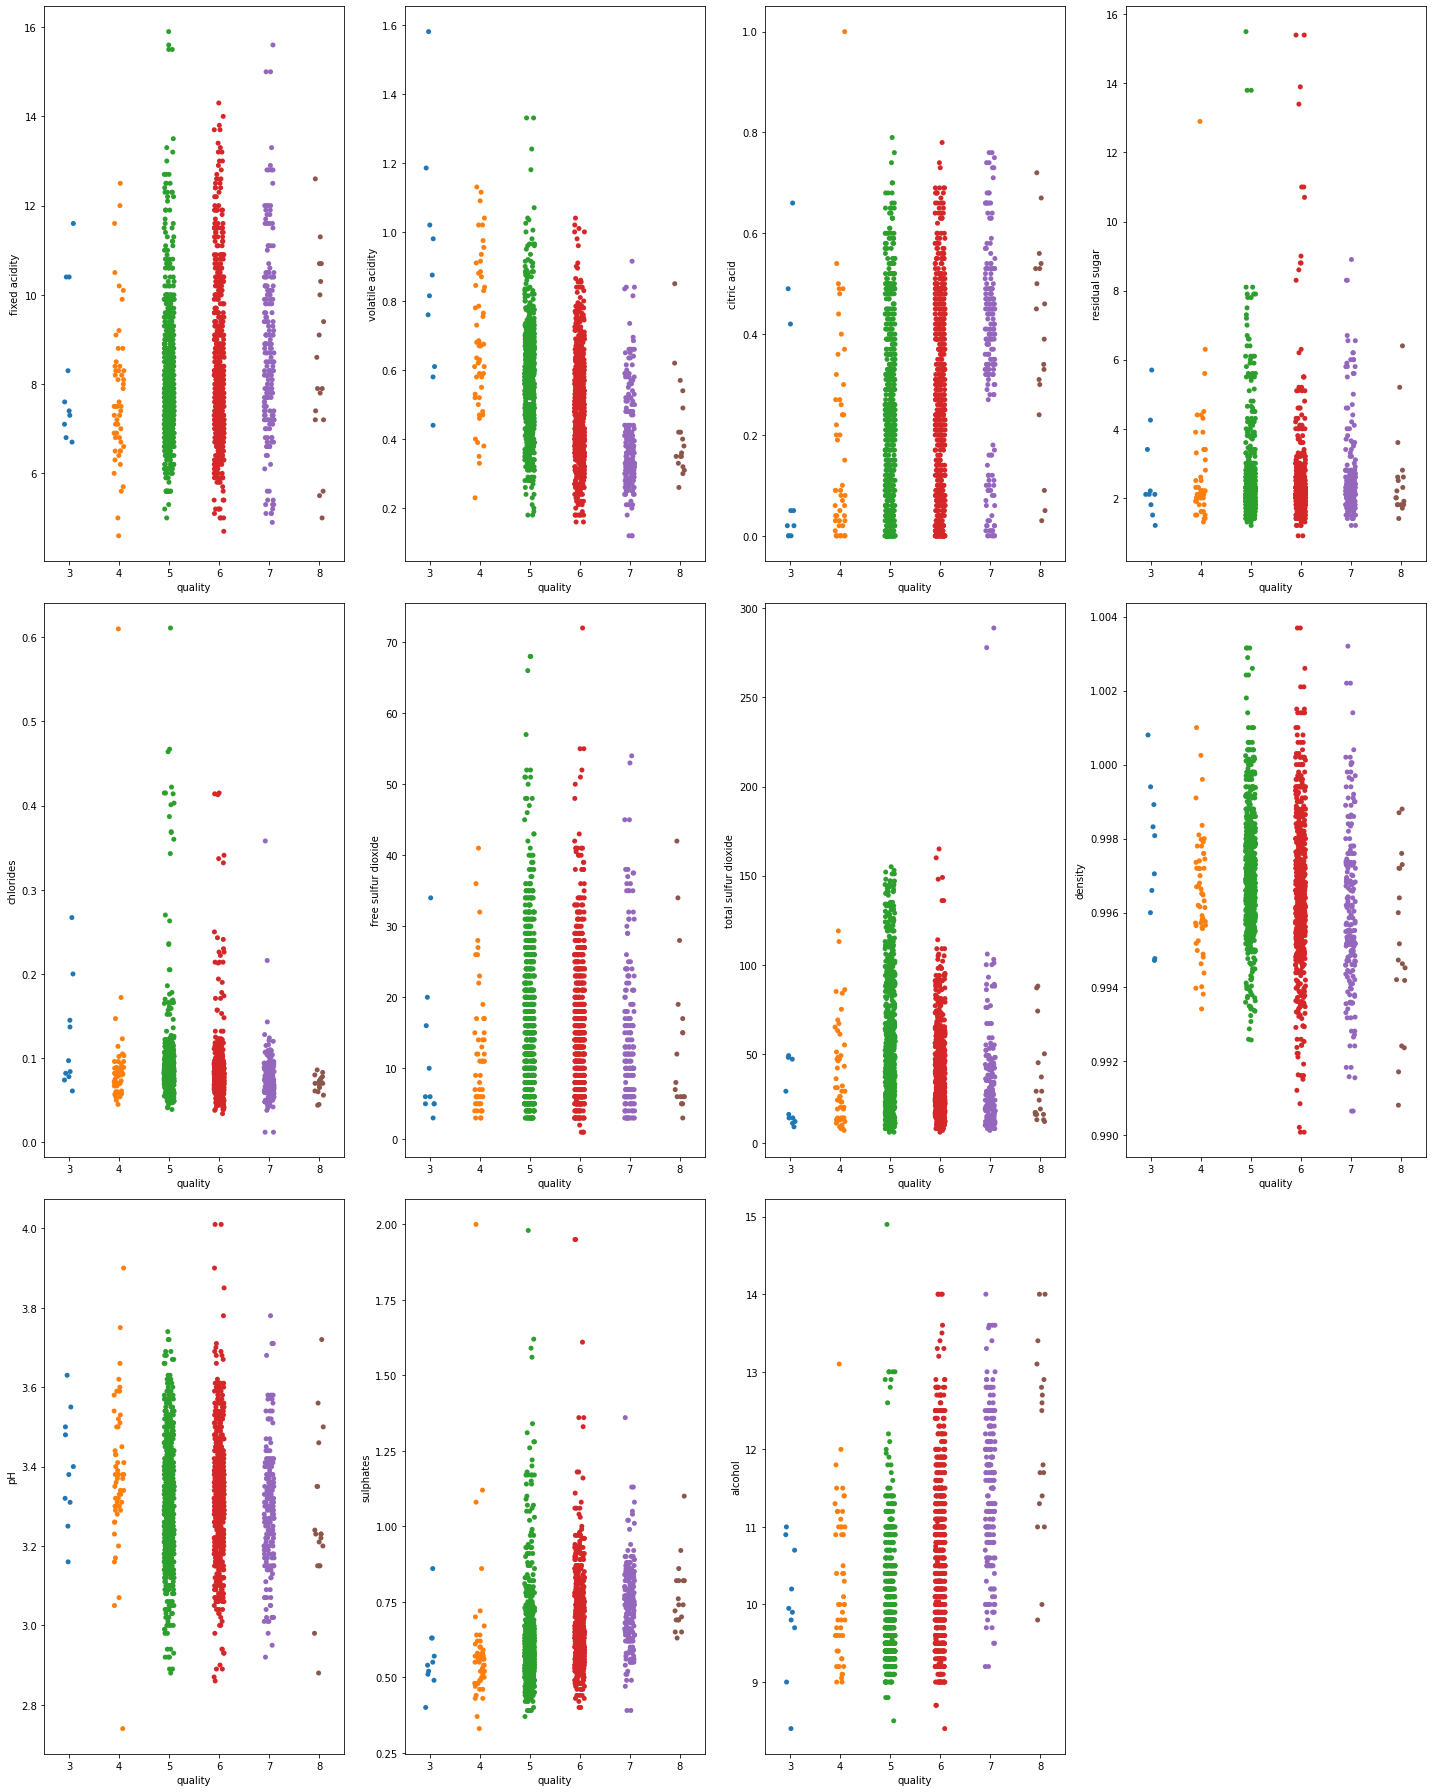

In [17]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df.columns[:-1]:
    if plotnumber<=11 :
        ax = plt.subplot(3,4,plotnumber)
        sns.stripplot(df['quality'],df[column])
    plotnumber+=1
plt.tight_layout()

### Outliers

<AxesSubplot: >

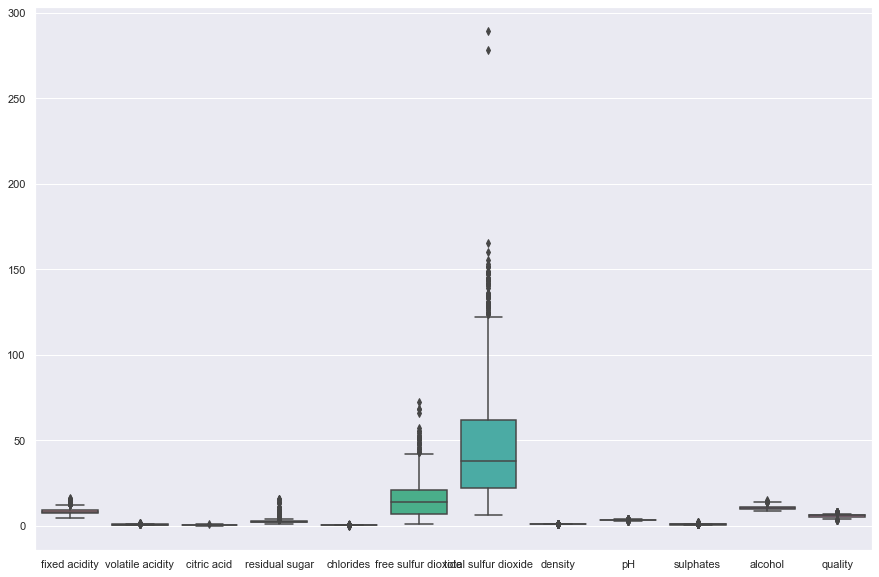

In [20]:
# Checking outliers
sns.boxplot(data=df)

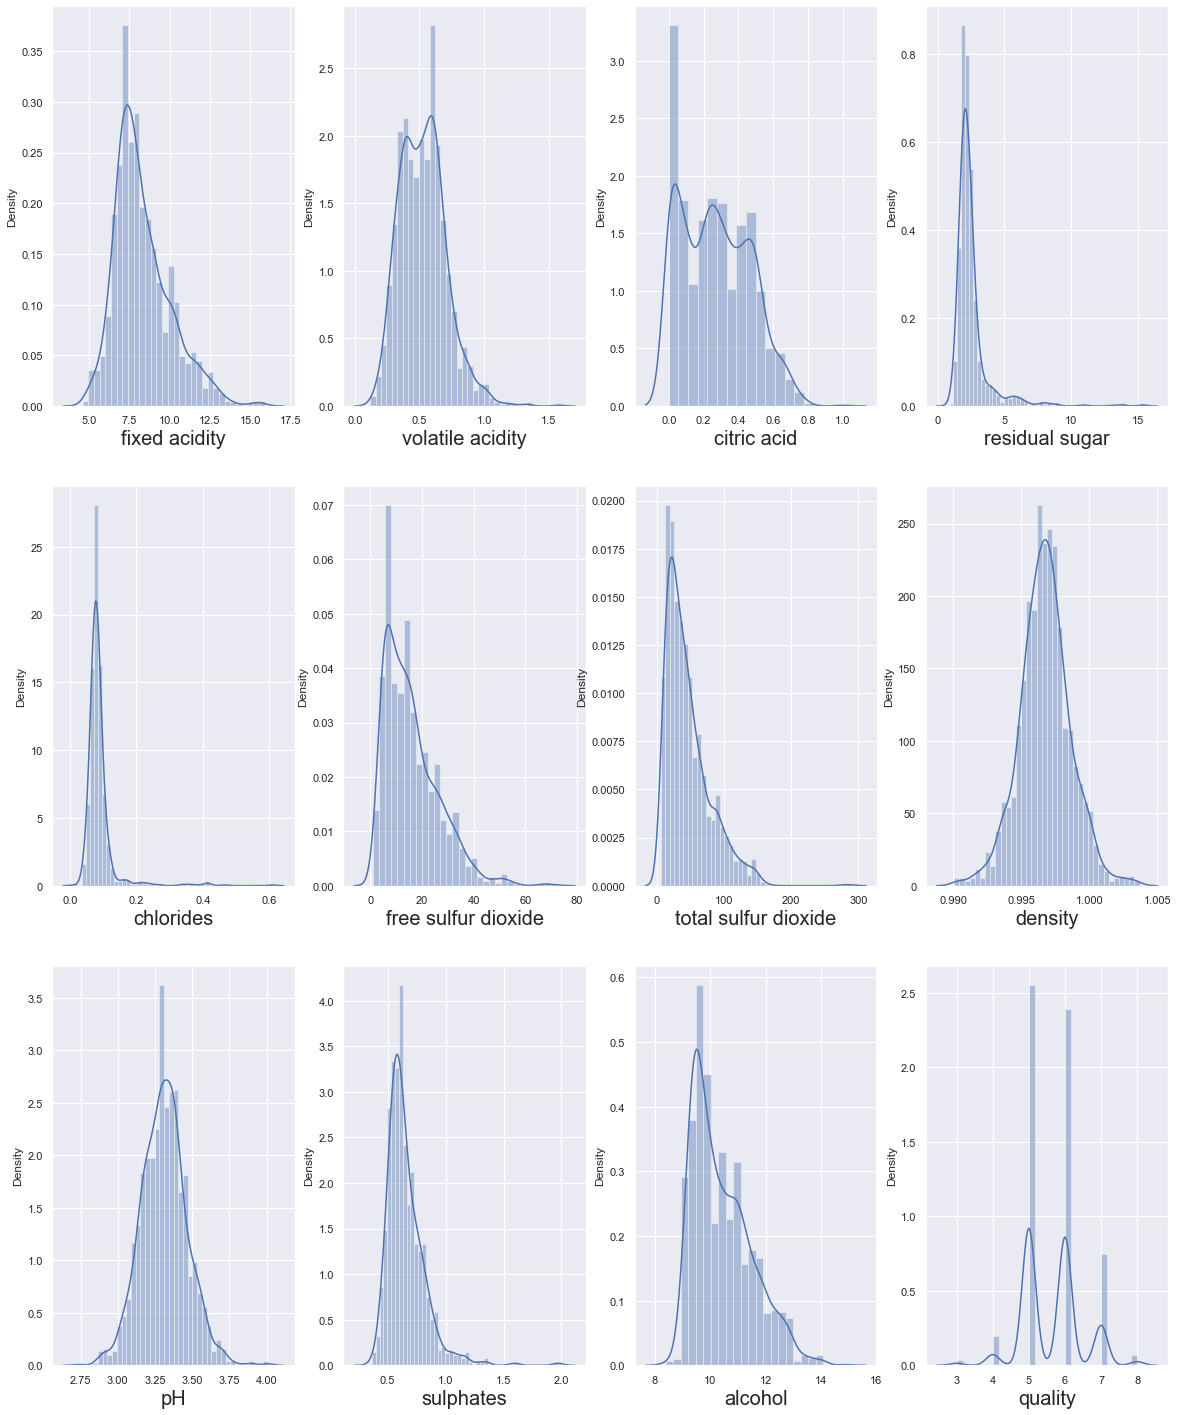

In [21]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df.columns:
    if plotnumber<=12 :     # as there are 12 columns in the data
        ax = plt.subplot(3,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [18]:
# copying into data into another variable
df_copy=df.copy()

In [19]:
df_copy.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Hnadling outliers

In [20]:
def outlier_threshold(df,variable):
    q1=df[variable].quantile(0.05)
    q2=df[variable].quantile(0.95)
    iqr=q2-q1
    up_limit=q2
    +(1.5*iqr)
    lower_limit=q1-(1.5*iqr)
    return lower_limit,up_limit

In [21]:
def replace_with_threshold(data,numeric_col):
    for variable in numeric_col:
        lower_limit,upper_limit=outlier_threshold(data,variable)
        data.loc[data[variable]<lower_limit,variable]=lower_limit
        data.loc[data[variable]>upper_limit,variable]=upper_limit

In [22]:
col_outlier=df_copy.columns[:-1]
col_outlier

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [23]:
replace_with_threshold(df_copy,col_outlier)

<AxesSubplot: >

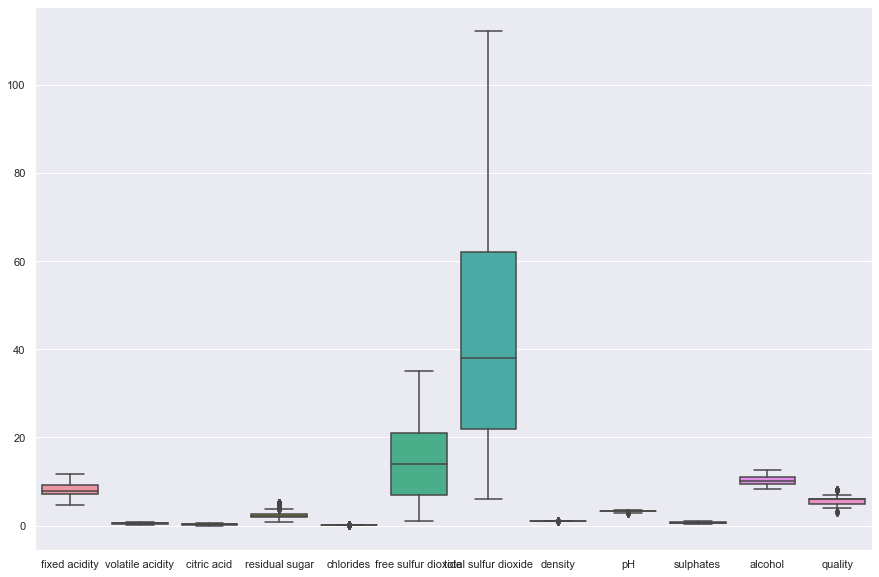

In [24]:
# Checking outliers
sns.set(rc={"figure.figsize":(15,10)})
sns.boxplot(data=df_copy)

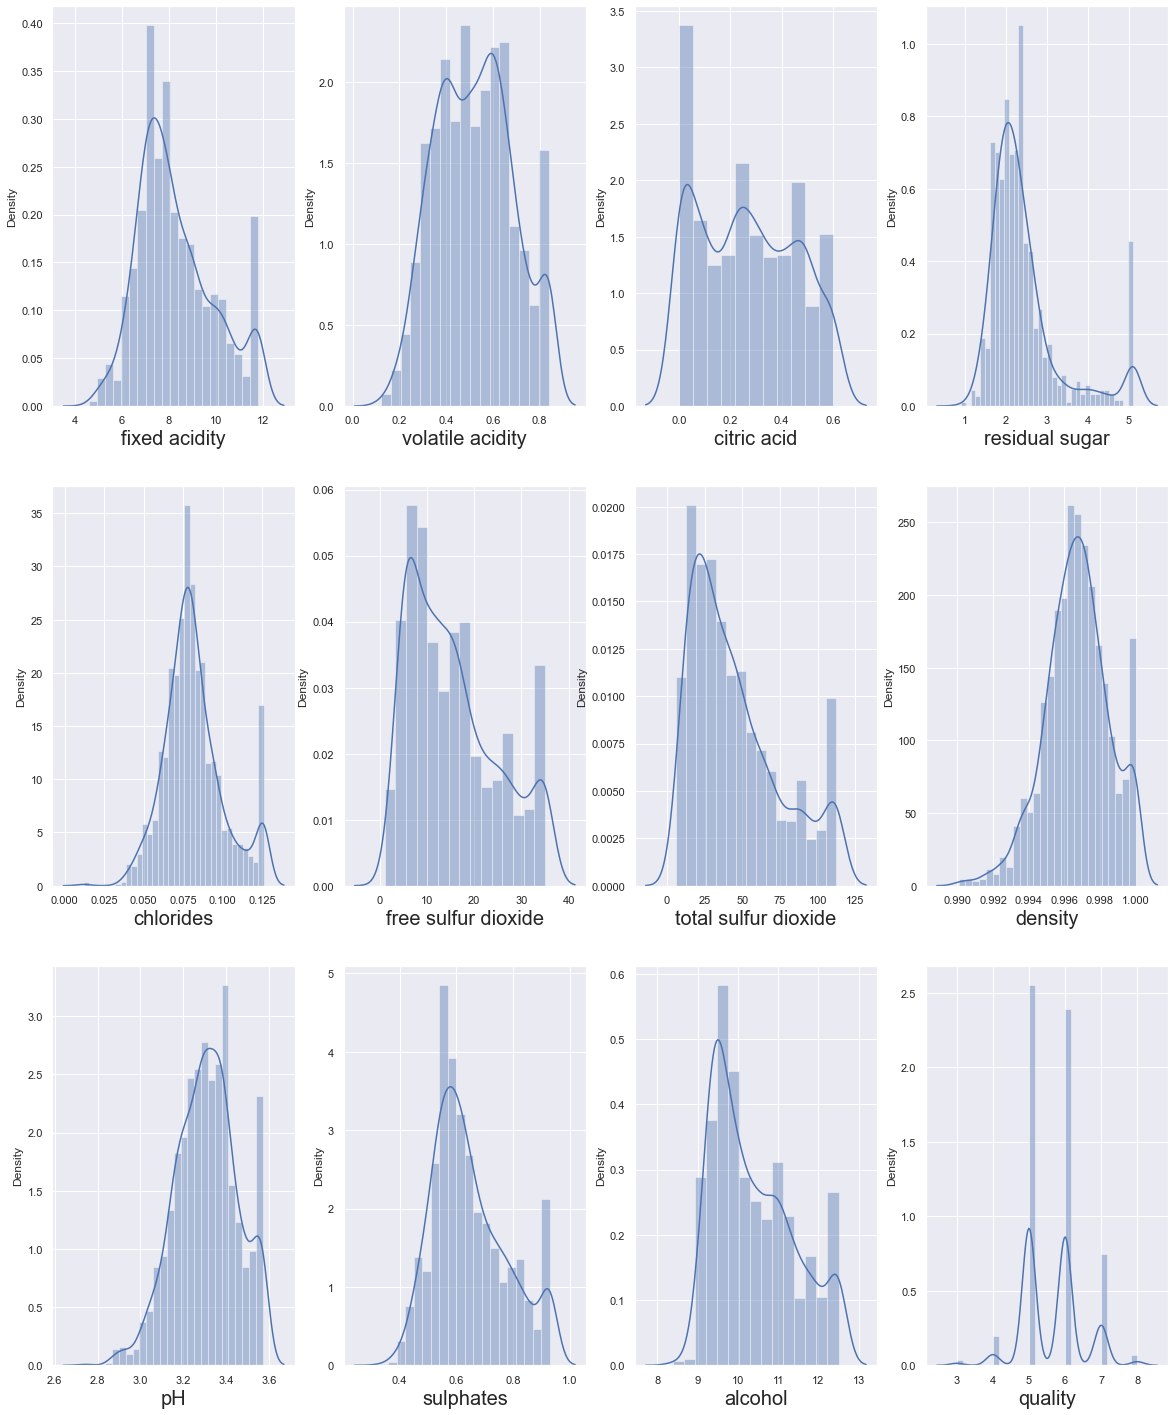

In [25]:
# Checking for distribution
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df_copy.columns:
    if plotnumber<=12 :     # as there are 12 columns in the data
        ax = plt.subplot(3,4,plotnumber)
        sns.distplot(df_copy[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

## Model building with data without handling outliers

In [16]:
X=df.drop('quality',axis=1)

In [17]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [18]:
y=df['quality']

In [19]:
y.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.33, random_state=42)

In [22]:
X_test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
803,7.7,0.56,0.08,2.50,0.114,14.0,46.0,0.9971,3.24,0.66,9.6
124,7.8,0.50,0.17,1.60,0.082,21.0,102.0,0.9960,3.39,0.48,9.5
350,10.7,0.67,0.22,2.70,0.107,17.0,34.0,1.0004,3.28,0.98,9.9
682,8.5,0.46,0.31,2.25,0.078,32.0,58.0,0.9980,3.33,0.54,9.8
1326,6.7,0.46,0.24,1.70,0.077,18.0,34.0,0.9948,3.39,0.60,10.6


In [23]:
X_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
548,12.4,0.350,0.49,2.6,0.079,27.0,69.0,0.99940,3.12,0.75,10.4
355,6.7,0.750,0.01,2.4,0.078,17.0,32.0,0.99550,3.55,0.61,12.8
1296,6.6,0.630,0.00,4.3,0.093,51.0,77.5,0.99558,3.20,0.45,9.5
209,11.0,0.300,0.58,2.1,0.054,7.0,19.0,0.99800,3.31,0.88,10.5
140,8.4,0.745,0.11,1.9,0.090,16.0,63.0,0.99650,3.19,0.82,9.6


In [24]:
y_train.head()

548     6
355     6
1296    5
209     7
140     5
Name: quality, dtype: int64

In [25]:
y_test.head()

803     6
124     5
350     6
682     5
1326    6
Name: quality, dtype: int64

In [26]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((1071, 11), (1071,), (528, 11), (528,))

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
scaler=StandardScaler()

In [29]:
scaler

StandardScaler()

In [30]:
scaler.fit(X_train) ## to calculate mean and std dev

StandardScaler()

In [31]:
scaler.mean_

array([ 8.30345472,  0.53246499,  0.26933707,  2.54691877,  0.08772736,
       15.91223156, 46.76330532,  0.99677933,  3.31453782,  0.65881419,
       10.41521942])

In [33]:
X_train_tf=scaler.transform(X_train)
X_train_tf

array([[ 2.40069523, -1.03103722,  1.12742595, ..., -1.26096312,
         0.52726134, -0.01431863],
       [-0.93967131,  1.22920403, -1.32502245, ...,  1.52622836,
        -0.28225704,  2.24363201],
       [-0.99827424,  0.55113165, -1.37611513, ..., -0.74241587,
        -1.20742091, -0.86105011],
       ...,
       [-0.6466567 ,  0.49462562, -1.06955908, ...,  1.26695473,
        -0.68701624, -0.86105011],
       [-0.23643625, -1.87862768,  0.4121285 , ...,  0.03540501,
         0.81637505,  1.39690052],
       [-1.46709761, -1.3700734 , -0.04770558, ...,  0.48913386,
        -0.68701624,  2.90220094]])

In [34]:
y_train

548     6
355     6
1296    5
209     7
140     5
       ..
1130    6
1294    6
860     5
1459    7
1126    6
Name: quality, Length: 1071, dtype: int64

## Model Training

In [35]:
from sklearn.svm import SVC

In [36]:
model=SVC()

In [37]:
model.fit(X_train_tf,y_train)

SVC()

In [38]:
# training accuracy
model.score(X_train_tf,y_train)

0.6778711484593838

In [41]:
X_test_tf=scaler.transform(X_test)
X_test_tf

array([[-3.53642095e-01,  1.55589436e-01, -9.67373729e-01, ...,
        -4.83142240e-01,  6.85666499e-03, -7.66968836e-01],
       [-2.95039173e-01, -1.83446751e-01, -5.07539654e-01, ...,
         4.89133857e-01, -1.03395269e+00, -8.61050113e-01],
       [ 1.40444556e+00,  7.77155778e-01, -2.52076279e-01, ...,
        -2.23868614e-01,  1.85718440e+00, -4.84725007e-01],
       ...,
       [-2.02456406e-03, -1.25706134e+00,  6.16499196e-01, ...,
        -2.94133945e-02,  6.42906824e-01,  1.96138818e+00],
       [-6.06274859e-02,  4.50655383e+00, -1.37611513e+00, ...,
         1.39659155e+00, -9.76129945e-01,  4.56087756e-01],
       [ 4.66798811e-01,  7.20649747e-01, -6.09725004e-01, ...,
        -2.23868614e-01, -6.87016236e-01, -7.66968836e-01]])

In [44]:
y_predict=model.predict(X_test_tf)
y_predict

array([5, 5, 6, 5, 6, 5, 5, 5, 6, 6, 6, 5, 6, 5, 5, 7, 5, 6, 7, 5, 5, 5,
       6, 6, 5, 5, 6, 5, 5, 6, 5, 5, 6, 5, 6, 5, 6, 6, 5, 6, 5, 5, 6, 5,
       6, 6, 6, 6, 5, 6, 5, 5, 6, 7, 5, 5, 6, 5, 6, 5, 6, 6, 5, 5, 7, 5,
       6, 5, 7, 5, 6, 5, 6, 6, 6, 5, 7, 5, 6, 7, 5, 7, 5, 5, 6, 6, 5, 6,
       6, 5, 6, 5, 5, 6, 5, 6, 5, 6, 5, 5, 5, 5, 6, 6, 6, 6, 6, 5, 6, 5,
       6, 5, 6, 5, 6, 6, 6, 5, 5, 6, 6, 6, 6, 5, 5, 5, 6, 6, 5, 6, 6, 5,
       5, 6, 6, 5, 5, 5, 5, 6, 6, 6, 6, 5, 6, 5, 6, 5, 6, 5, 6, 6, 5, 6,
       6, 6, 5, 6, 5, 6, 7, 6, 6, 5, 5, 6, 5, 5, 5, 5, 5, 5, 6, 5, 7, 6,
       6, 5, 5, 5, 5, 7, 5, 7, 5, 6, 6, 6, 7, 5, 6, 6, 5, 6, 6, 5, 5, 5,
       6, 6, 5, 5, 5, 5, 7, 6, 5, 5, 6, 6, 7, 5, 6, 6, 6, 6, 6, 5, 6, 5,
       5, 6, 6, 6, 5, 5, 5, 7, 5, 5, 5, 5, 6, 6, 5, 6, 5, 6, 6, 5, 5, 5,
       6, 6, 5, 6, 6, 5, 6, 5, 6, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 5, 7,
       6, 7, 6, 5, 6, 6, 5, 6, 5, 5, 5, 5, 6, 6, 6, 5, 7, 5, 5, 5, 5, 6,
       5, 6, 5, 6, 5, 7, 6, 5, 5, 6, 5, 6, 6, 7, 5,

In [43]:
y_test

803     6
124     5
350     6
682     5
1326    6
       ..
813     4
377     7
898     7
126     5
819     5
Name: quality, Length: 528, dtype: int64

In [45]:
from sklearn.metrics import accuracy_score

In [46]:
accuracy_score(y_test,y_predict)

0.5984848484848485

### Model buidling with handling outliers dataset

In [26]:
X=df_copy.drop('quality',axis=1)

In [27]:
y=df_copy['quality']

In [28]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.84,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [29]:
y.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.25, random_state=42)

In [31]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((1199, 11), (1199,), (400, 11), (400,))

### scaling

In [32]:
from sklearn.preprocessing import StandardScaler
scaler1=StandardScaler()

In [33]:
scaler1

StandardScaler()

In [34]:
scaler1.fit(X_train) ## to calculate mean and std dev

StandardScaler()

In [35]:
scaler1.mean_

array([ 8.27122602,  0.52516264,  0.26829858,  2.43073394,  0.08187681,
       15.4941618 , 45.61209341,  0.99672199,  3.30727273,  0.64726439,
       10.39443981])

In [36]:
X_train_tf=scaler1.transform(X_train)
X_train_tf

array([[ 2.15762026, -0.21623286,  1.18371148, ..., -0.80958702,
        -1.67330847, -1.20158801],
       [ 0.33274093,  0.46021287,  0.11586853, ...,  0.36400037,
        -1.21120555, -1.30218647],
       [-0.73701591,  0.39871781, -1.43250375, ...,  0.77820768,
        -0.74910263,  1.11217649],
       ...,
       [-0.67408904,  0.58320301, -1.11215086, ...,  1.39951865,
        -0.82611978, -0.89979264],
       [-0.23360093, -1.99958981,  0.43622141, ...,  0.08786216,
         1.17632622,  1.51457031],
       [-1.55506527, -1.4461342 , -0.04430791, ...,  0.57110402,
        -0.82611978,  2.11816105]])

In [37]:
X_test_tf=scaler1.transform(X_test)
X_test_tf

array([[-0.35945467,  0.21423261, -1.00536657, ..., -0.46441426,
         0.09808607, -0.79919419],
       [-0.2965278 , -0.1547378 , -0.52483724, ...,  0.57110402,
        -1.2882227 , -0.89979264],
       [ 1.52835152,  0.89067834, -0.2578765 , ..., -0.18827605,
         2.17754922, -0.49739882],
       ...,
       [-0.73701591,  0.46021287, -1.43250375, ...,  1.12338044,
         0.40615468, -0.49739882],
       [-0.2965278 ,  0.58320301, -1.16554301, ..., -0.1192415 ,
        -0.1329654 , -1.10098956],
       [ 1.46542465, -1.01566874,  1.61084866, ..., -1.15475979,
         0.56018899,  0.70978266]])

In [38]:
from sklearn.svm import SVC
model1=SVC()

In [39]:
model1

SVC()

In [40]:
model1.fit(X_train_tf,y_train)

SVC()

In [41]:
# training accuracy
model1.score(X_train_tf,y_train)

0.683069224353628

In [42]:
y_predict=model1.predict(X_test_tf)
y_predict

array([5, 5, 6, 5, 6, 5, 5, 5, 6, 6, 6, 5, 6, 5, 5, 7, 5, 5, 7, 5, 5, 5,
       6, 6, 5, 6, 6, 5, 5, 6, 5, 5, 6, 5, 6, 5, 6, 6, 5, 6, 5, 5, 6, 5,
       6, 6, 6, 6, 5, 6, 5, 5, 6, 7, 5, 5, 6, 6, 6, 5, 6, 6, 5, 5, 7, 5,
       7, 6, 6, 5, 6, 5, 6, 6, 6, 5, 7, 5, 6, 7, 5, 7, 5, 5, 6, 6, 5, 6,
       6, 5, 6, 5, 6, 6, 5, 6, 5, 6, 5, 5, 5, 5, 6, 6, 6, 6, 6, 5, 6, 5,
       6, 5, 6, 5, 6, 6, 6, 5, 5, 6, 6, 6, 6, 5, 5, 5, 6, 5, 5, 6, 6, 5,
       5, 6, 6, 5, 5, 5, 5, 6, 6, 6, 6, 5, 6, 5, 6, 6, 6, 5, 6, 6, 5, 6,
       6, 6, 5, 6, 5, 6, 6, 6, 6, 5, 5, 6, 5, 5, 5, 5, 5, 5, 6, 5, 7, 6,
       6, 5, 5, 5, 5, 7, 5, 7, 5, 6, 6, 6, 7, 5, 6, 6, 6, 6, 6, 5, 5, 5,
       5, 6, 5, 5, 5, 5, 7, 6, 5, 6, 6, 6, 5, 5, 6, 6, 6, 6, 5, 5, 6, 5,
       5, 6, 6, 6, 6, 5, 5, 7, 5, 5, 5, 5, 6, 6, 5, 6, 5, 6, 5, 5, 5, 5,
       6, 6, 5, 5, 6, 5, 7, 5, 6, 5, 6, 6, 5, 5, 5, 6, 6, 6, 6, 6, 5, 7,
       6, 7, 5, 5, 6, 6, 5, 6, 5, 5, 5, 5, 6, 6, 6, 5, 7, 5, 5, 5, 5, 6,
       5, 6, 5, 6, 5, 7, 6, 5, 5, 6, 5, 6, 6, 7, 5,

In [43]:
y_test

803     6
124     5
350     6
682     5
1326    6
       ..
1565    6
327     5
254     6
322     5
1160    7
Name: quality, Length: 400, dtype: int64

In [44]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict)

0.6

### GridsearchCV

In [46]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],'gamma': [1, 0.1, 0.01, 0.001, 0.0001],'kernel': ['rbf','sigmoid']}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3,cv=5)

# fitting the model for grid search
grid.fit(X_train, y_train)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.433 total time=   0.2s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.433 total time=   0.2s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.429 total time=   0.2s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.429 total time=   0.2s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.431 total time=   0.2s
[CV 1/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.433 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.433 total time=   0.0s
[CV 3/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.429 total time=   0.0s
[CV 4/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.429 total time=   0.0s
[CV 5/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.431 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.425 total time=   0.1s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf

[CV 2/5] END .........C=10, gamma=1, kernel=rbf;, score=0.554 total time=   0.3s
[CV 3/5] END .........C=10, gamma=1, kernel=rbf;, score=0.537 total time=   0.3s
[CV 4/5] END .........C=10, gamma=1, kernel=rbf;, score=0.583 total time=   0.3s
[CV 5/5] END .........C=10, gamma=1, kernel=rbf;, score=0.548 total time=   0.3s
[CV 1/5] END .....C=10, gamma=1, kernel=sigmoid;, score=0.433 total time=   0.0s
[CV 2/5] END .....C=10, gamma=1, kernel=sigmoid;, score=0.433 total time=   0.0s
[CV 3/5] END .....C=10, gamma=1, kernel=sigmoid;, score=0.429 total time=   0.0s
[CV 4/5] END .....C=10, gamma=1, kernel=sigmoid;, score=0.429 total time=   0.0s
[CV 5/5] END .....C=10, gamma=1, kernel=sigmoid;, score=0.431 total time=   0.0s
[CV 1/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.525 total time=   0.1s
[CV 2/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.596 total time=   0.1s
[CV 3/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.537 total time=   0.1s
[CV 4/5] END .......C=10, ga

[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.583 total time=   0.2s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.548 total time=   0.2s
[CV 1/5] END ...C=1000, gamma=1, kernel=sigmoid;, score=0.433 total time=   0.0s
[CV 2/5] END ...C=1000, gamma=1, kernel=sigmoid;, score=0.433 total time=   0.0s
[CV 3/5] END ...C=1000, gamma=1, kernel=sigmoid;, score=0.429 total time=   0.0s
[CV 4/5] END ...C=1000, gamma=1, kernel=sigmoid;, score=0.429 total time=   0.0s
[CV 5/5] END ...C=1000, gamma=1, kernel=sigmoid;, score=0.431 total time=   0.0s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.554 total time=   0.1s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.604 total time=   0.1s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.567 total time=   0.1s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.558 total time=   0.1s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.586 total time=   0.1s
[CV 1/5] END .C=1000, gamma=

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'sigmoid']},
             verbose=3)

In [47]:
grid.best_params_

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

In [54]:
grid.best_estimator_

SVC(C=1000, gamma=0.001)

In [49]:
model2=SVC(C=1000,gamma=0.001,kernel='rbf')

In [50]:
model2.fit(X_train, y_train)

SVC(C=1000, gamma=0.001)

In [51]:
model2.score(X_train, y_train)

0.6797331109257715

In [52]:
y_predict=model1.predict(X_test_tf)
y_predict

array([5, 5, 6, 5, 6, 5, 5, 5, 6, 6, 6, 5, 6, 5, 5, 7, 5, 5, 7, 5, 5, 5,
       6, 6, 5, 6, 6, 5, 5, 6, 5, 5, 6, 5, 6, 5, 6, 6, 5, 6, 5, 5, 6, 5,
       6, 6, 6, 6, 5, 6, 5, 5, 6, 7, 5, 5, 6, 6, 6, 5, 6, 6, 5, 5, 7, 5,
       7, 6, 6, 5, 6, 5, 6, 6, 6, 5, 7, 5, 6, 7, 5, 7, 5, 5, 6, 6, 5, 6,
       6, 5, 6, 5, 6, 6, 5, 6, 5, 6, 5, 5, 5, 5, 6, 6, 6, 6, 6, 5, 6, 5,
       6, 5, 6, 5, 6, 6, 6, 5, 5, 6, 6, 6, 6, 5, 5, 5, 6, 5, 5, 6, 6, 5,
       5, 6, 6, 5, 5, 5, 5, 6, 6, 6, 6, 5, 6, 5, 6, 6, 6, 5, 6, 6, 5, 6,
       6, 6, 5, 6, 5, 6, 6, 6, 6, 5, 5, 6, 5, 5, 5, 5, 5, 5, 6, 5, 7, 6,
       6, 5, 5, 5, 5, 7, 5, 7, 5, 6, 6, 6, 7, 5, 6, 6, 6, 6, 6, 5, 5, 5,
       5, 6, 5, 5, 5, 5, 7, 6, 5, 6, 6, 6, 5, 5, 6, 6, 6, 6, 5, 5, 6, 5,
       5, 6, 6, 6, 6, 5, 5, 7, 5, 5, 5, 5, 6, 6, 5, 6, 5, 6, 5, 5, 5, 5,
       6, 6, 5, 5, 6, 5, 7, 5, 6, 5, 6, 6, 5, 5, 5, 6, 6, 6, 6, 6, 5, 7,
       6, 7, 5, 5, 6, 6, 5, 6, 5, 5, 5, 5, 6, 6, 6, 5, 7, 5, 5, 5, 5, 6,
       5, 6, 5, 6, 5, 7, 6, 5, 5, 6, 5, 6, 6, 7, 5,

In [53]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict)

0.6

## RandomizedSearchCV

In [136]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from scipy import stats
from sklearn.metrics import make_scorer, roc_auc_score

In [67]:
# DEFINE MODEL AND PERFORMANCE MEASURE
model3 = SVC(probability = True, random_state = 1)
auc = make_scorer(roc_auc_score)

In [126]:
rand_list = {"C": stats.uniform(1, 10000),
             "gamma": stats.uniform(0.00001, 1)}
rand_search = RandomizedSearchCV(model3, param_distributions = rand_list, n_jobs = 4, cv = 3, random_state = 0, scoring = auc) 

In [127]:
rand_search .fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=SVC(probability=True, random_state=1),
                   n_jobs=4,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000026BD0F01D00>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000026BCD191430>},
                   random_state=0, scoring=make_scorer(roc_auc_score))

In [128]:
rand_search.cv_results_

{'mean_fit_time': array([1.74126403, 1.62345203, 1.65369829, 1.88696599, 1.64579995,
        1.70967476, 1.8978734 , 1.19113676, 1.97291851, 1.856402  ]),
 'std_fit_time': array([0.03018157, 0.04709285, 0.1364146 , 0.06630488, 0.05366633,
        0.07949518, 0.06382299, 0.05272531, 0.01324048, 0.10637294]),
 'mean_score_time': array([0.13412905, 0.14020626, 0.13272858, 0.11972404, 0.10265644,
        0.1364425 , 0.15784319, 0.1161329 , 0.15284165, 0.10440183]),
 'std_score_time': array([0.00715337, 0.01106683, 0.01479134, 0.03158372, 0.00271796,
        0.01697336, 0.0086379 , 0.00235931, 0.00413878, 0.03623939]),
 'param_C': masked_array(data=[5489.1350392732475, 6028.633760716439,
                    4237.547993389047, 4376.872112626925,
                    9637.627605010293, 7918.250380826646,
                    5681.445610939323, 711.3605819788694,
                    203.1839744032572, 7782.5675094985045],
              mask=[False, False, False, False, False, False, False, False

In [129]:
rand_search.best_params_

{'C': 5489.1350392732475, 'gamma': 0.7151993663724194}

In [130]:
rand_search.best_estimator_

SVC(C=5489.1350392732475, gamma=0.7151993663724194, probability=True,
    random_state=1)

In [131]:
model4=SVC(C=5489.1350392732475, gamma=0.7151993663724194, probability=True,
    random_state=1)

In [132]:
model4.fit(X_train, y_train)

SVC(C=5489.1350392732475, gamma=0.7151993663724194, probability=True,
    random_state=1)

In [133]:
model4.score(X_train, y_train)

1.0

In [134]:
y_predict=model4.predict(X_test_tf)
y_predict

array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,

In [135]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict)

0.41